**NAMA : MARINA IRDAYANTI**

**NIM  : 1301174319**

**KELAS: IF-41-12**

# Dataset yang digunakan

Pada dataset “used_cars.csv”, klasifikasi fitur yang digunakan adalah “price” dan “year”. Price adalah harga kendaraan tersebut. Year adalah tahun kendaraan yang diproduksi atau digunakan. Kemudian,dua fitur ini akan digabungkan dengan kolom “state” dimana negara yang terdiri dari beberapa cakupan wilayah.

Penggunaan Library



In [ ]:
import pandas as pd               #digunakan untuk dataset
import seaborn as sns             #digunakan untuk visualisasi data
import matplotlib.pyplot as plt   #digunakan untuk membuat plot
import numpy as np                #digunakan untuk pengolahan angka
%matplotlib inline

IMPORT FILE

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving used_cars.csv to used_cars.csv


In [ ]:
dataset = pd.read_csv("used_cars.csv")

Pengecekan Dataset

In [ ]:
dataset.head(10)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
5,5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.0,ram,NaN,NaN,NaN,gas,120057.0,clean,automatic,1D3HV18P89S777871,4wd,NaN,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",NaN,ut,40.3744,-104.694
6,6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.0,ford,f-350,NaN,NaN,diesel,95484.0,clean,automatic,1FT8W3BT2HEE98744,4wd,NaN,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,NaN,ut,40.3744,-104.694
7,7,7034405349,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,14500,2007.0,gmc,sierra,NaN,NaN,gas,89340.0,clean,automatic,1GTGK13UX7F108498,4wd,NaN,pickup,NaN,https://images.craigslist.org/00202_jTNQzQVWZs...,2007 GMC Sierra 1500 SLE Crew Cab 4WD Offe...,NaN,ut,40.3744,-104.694
8,8,7034404595,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12500,2013.0,ford,f-250,NaN,NaN,gas,226031.0,clean,automatic,1FT7X2B63DEA44140,4wd,NaN,pickup,white,https://images.craigslist.org/00F0F_99lwfqrZWc...,2013 Ford F-250 F250 F 250 SD XLT 4WD Offe...,NaN,ut,40.3744,-104.694
9,9,7034401857,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2012.0,ram,NaN,NaN,NaN,diesel,128153.0,clean,automatic,3C6UD5PL2CG168524,4wd,NaN,pickup,silver,https://images.craigslist.org/00a0a_1cDSDtUsLA...,"2012 RAM 2500 4WD Mega Cab 160.5"" Laramie Long...",NaN,ut,40.3744,-104.694


# - Preprosessing

---



**Menghapus kolom yang tidak digunakan**

In [ ]:
dataset.dropna(subset = ["year"], inplace=True)

**Melakukan pengubahan pada isi kolom 'state' menjadi opsi angka**

In [ ]:
dataset['state'] = dataset['state'].str.replace(r'va', '1')
dataset['state'] = dataset['state'].str.replace(r'ut', '2')
dataset['state'] = dataset['state'].str.replace(r'vt', '3')
dataset['state'] = dataset['state'].str.replace(r'wa', '4')

**Setelah mengubah menjadi 1,2,3,4 dan berupa tipe string, kemudian diubah menjadi tipe integer**

In [ ]:
dataset.state = dataset.state.astype(int)
dataset.state

0        2
1        2
2        2
3        2
4        2
        ..
19996    4
19997    4
19998    4
19999    4
20000    4
Name: state, Length: 19989, dtype: int64

# Scaling fitur yang digunakan

Menggunakan range 0 sampai 1 dengan minmaxscaler untuk normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

fitur_scaler = MinMaxScaler(feature_range=(0, 1))
s = dataset[['price', 'year']]
dataset[['price', 'year']] = fitur_scaler.fit_transform(s)

In [ ]:
ScaledDATA = dataset[['state','price','year']]

In [ ]:
ScaledDATA

,state,price,year
0,2,0.000015,0.922330
1,2,0.000000,0.961165
2,2,0.000040,0.951456
3,2,0.000000,0.961165
4,2,0.000043,0.980583
...,...,...,...
19996,4,0.000043,0.961165
19997,4,0.000010,0.980583
19998,4,0.000000,0.990291
19999,4,0.000013,0.970874


# Melakukan Hapus Outlier

Untuk memastikan dataset tidak terjadi kesalahan penginputan data dan  pengambilan sampel

In [ ]:
from scipy import stats
from scipy.stats import zscore

hasil_z = stats.zscore(ScaledDATA)

# menghitung z-score dari "ScaledDATA" untuk menghapus data outliers 

abs_z_scores = np.abs(hasil_z)
pilih_data = (abs_z_scores < 3).all(axis=1)
NewData = ScaledDATA [pilih_data]

# memindahkan isi dataframe ke array list

Class = NewData[['price','year']]
Position = NewData['state']

In [ ]:
x = np.asarray(Class)
y = np.asarray(Position)

# **Classification** K-Nearest Neighbor 

K-nearest neighbors atau knn adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.

K-nearest neighbors melakukan klasifikasi dengan proyeksi data pembelajaran pada ruang berdimensi banyak. Ruang ini dibagi menjadi bagian-bagian yang merepresentasikan kriteria data pembelajaran. Selain itu, memiliki kelebihan dimana sifatnya nonlinear dan mudah diimplementasikan


# Split Data

**Melakukan prediksi dengan split data menggunakan perbandingan 0.8 dengan 0.2**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Training Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
prediksi = model_knn.predict(X_test)

# Evaluasi pada klasifikasi

**Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
matrix=confusion_matrix(y_test,prediksi)
print(matrix)

[[1991   44  247  257]
 [  56   24   17   28]
 [ 286    5  229   55]
 [ 238   26   58  369]]


In [ ]:
print(classification_report(y_test,prediksi))

              precision    recall  f1-score   support

           1       0.77      0.78      0.78      2539
           2       0.24      0.19      0.21       125
           3       0.42      0.40      0.41       575
           4       0.52      0.53      0.53       691

    accuracy                           0.66      3930
   macro avg       0.49      0.48      0.48      3930
weighted avg       0.66      0.66      0.66      3930



# Memilih 'k' dengan elbow method

In [ ]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,y_train)
    prediksi_i = model_knn.predict(X_test)
    error_rate.append(np.mean(prediksi_i != y_test))

Text(0, 0.5, 'kesalahan klasifikasi')

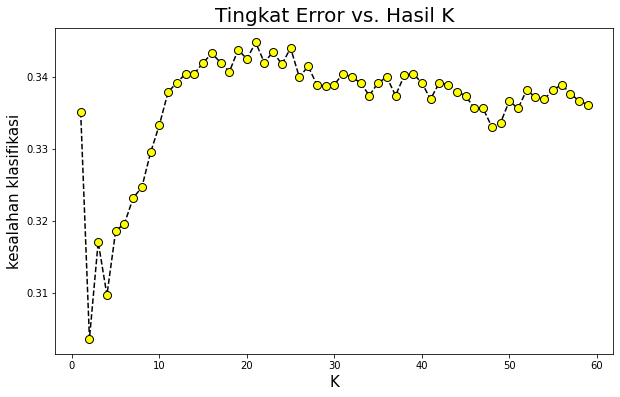

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=8)
plt.title('Tingkat Error vs. Hasil K', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('kesalahan klasifikasi',fontsize=15)

## Kesimpulan dan Analisis

---

Model dibentuk dengan K-Nearest Neighbor dan berupa data yang telah dilatih dan sudah diuji pada data testing, pengukuran performansi menerapkan confussion matrix dengan pengukuran akurasi, presisi, recall, dan F1 Score.

Pada pengujian, dalam proses klasifikasi menunjukkan bahwa dari masalah awal yang diangkat adalah “price” dan  "year". Price adalah harga kendaraan tersebut. Year adalah tahun kendaraan yang diproduksi atau digunakan.

Dapat diketahui dari hasil F1 Score adalah 0.48 karena, harga dapat memengaruhi year dimana tahun pada kendaraan tersebut baik itu dari produksi atau pemakaian. Hal itu terjadi karena tipe state atau negara yang ditempati oleh kendaraan dimana disesuaikan dengan harganya. Untuk itu, pengguna mobil seperti ini menyesuaikan seleranya dengan negara yang ditempatinya sebanding dengan harga tersebut. Oleh karena itu, maka akan sangat berpengaruh terhadap jumlah yang digunakan pada tiap tahunnya.